<a href="https://colab.research.google.com/github/rebecca-aquino/teaching/blob/main/Home_Prices_Project_(11_17_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Housing Data Import 

In [300]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import seaborn as sns
%matplotlib inline 

In [301]:
house_data_path='https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv'
df_house=pd.read_csv(house_data_path) # invoke Pandas and use read_csv() method passing in the parameter of the csv location, in this case a url address
df_house.head(1) # Visually Inspect that it loaded correctly

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [217]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [218]:
df_house['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [219]:
df_house.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#Model 1

In [220]:
lm1= LinearRegression()

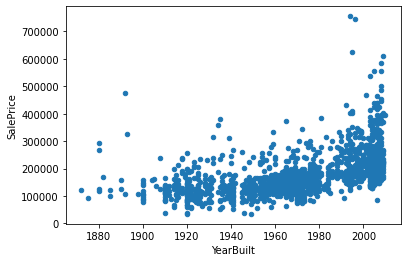

In [221]:
df_house.plot.scatter('YearBuilt','SalePrice')

In [222]:
x= df_house[['YearBuilt']]
y= df_house['SalePrice']

In [223]:
lm1.fit(x, y)
lm1

LinearRegression()

In [224]:
lm1.fit(df_house[['YearBuilt']],df_house[['SalePrice']])
Yhat1=lm1.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


## evaluation

In [225]:
mse= mean_squared_error(df_house['SalePrice'], Yhat1)
print('The mean square error of SalePrice and predicted value is: ', mse)

r_sq=lm1.score(df_house[['YearBuilt']],df_house[['SalePrice']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of SalePrice and predicted value is:  4582376228.725916
coefficiend of determination: 0.27342162073249154


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


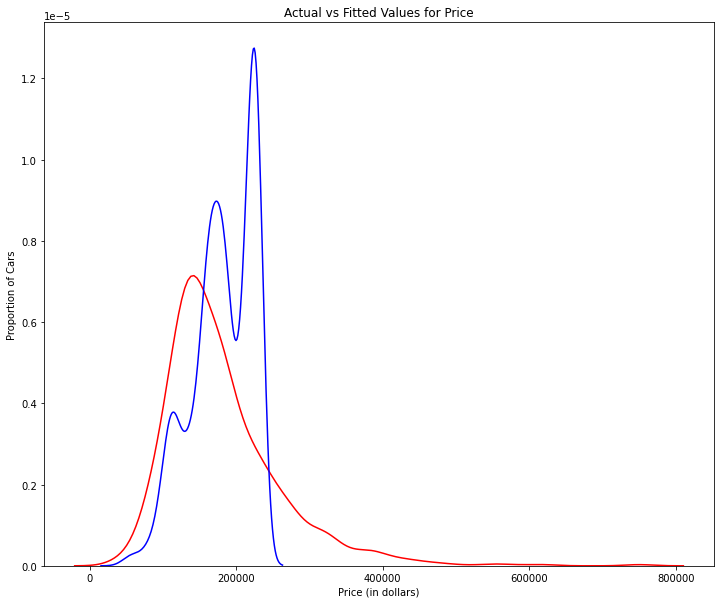

In [226]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Model 2

In [227]:
lm2=LinearRegression()

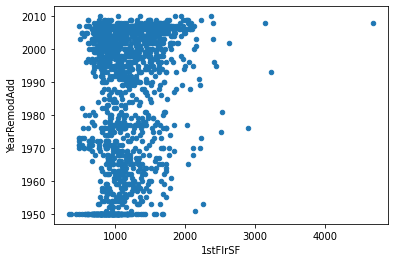

In [228]:
df_house.plot.scatter('1stFlrSF','YearRemodAdd')

In [229]:
x= df_house[['1stFlrSF']]
y= df_house['YearRemodAdd']

In [230]:
lm2.fit(x, y)

LinearRegression()

In [231]:
lm2.fit(df_house[['1stFlrSF']],df_house[['YearRemodAdd']])
Yhat1=lm2.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluation 

In [232]:
mse= mean_squared_error(df_house['YearRemodAdd'], Yhat1)
print('The mean square error of SalePrice and predicted value is: ', mse)

r_sq=lm2.score(df_house[['1stFlrSF']],df_house[['YearRemodAdd']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of SalePrice and predicted value is:  401.3290840190893
coefficiend of determination: 0.05778219229362136


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


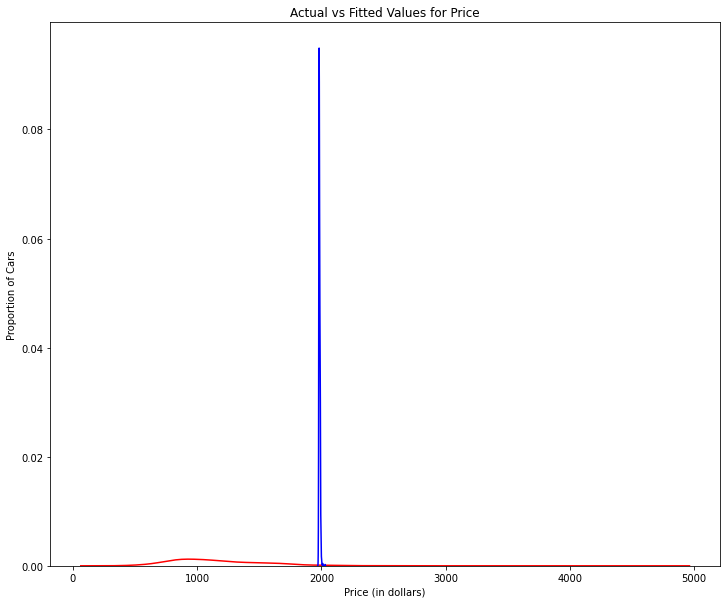

In [233]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['1stFlrSF'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 3

In [234]:
lm3=LinearRegression()

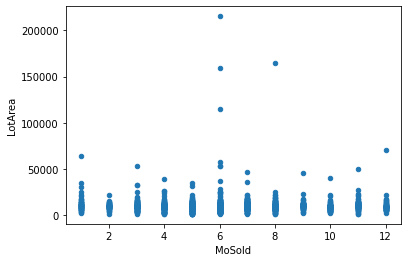

In [235]:
df_house.plot.scatter('MoSold','LotArea')

In [236]:
x= df_house[['MoSold']]
y= df_house['LotArea']

In [237]:
lm3.fit(x,y)

LinearRegression()

In [238]:
lm3.fit(df_house[['MoSold']],df_house[['LotArea']])
Yhat1=lm3.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluation

In [239]:
mse= mean_squared_error(df_house['LotArea'], Yhat1)
print('The mean square error of SalePrice and predicted value is: ', mse)

r_sq=lm3.score(df_house[['MoSold']],df_house[['LotArea']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of SalePrice and predicted value is:  99557268.34697922
coefficiend of determination: 1.4519966166082199e-06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


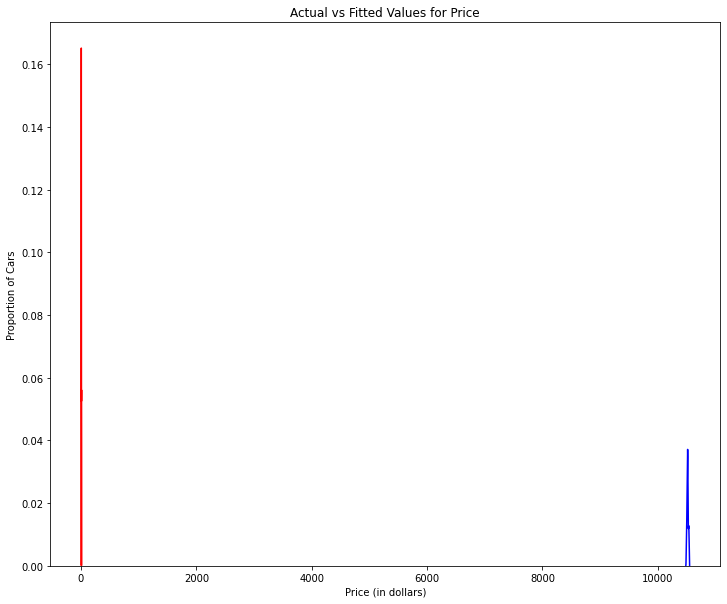

In [240]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['MoSold'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 4

In [241]:
lm4=LinearRegression()

In [242]:
x= df_house[['OverallQual']]
y= df_house['GarageArea']

In [243]:
lm4.fit(x,y)

LinearRegression()

In [244]:
lm4.fit(df_house[['OverallQual']],df_house[['GarageArea']])
Yhat1=lm4.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [245]:
mse= mean_squared_error(df_house['GarageArea'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm4.score(df_house[['OverallQual']],df_house[['GarageArea']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  31251.95013641809
coefficiend of determination: 0.3158684549059213


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


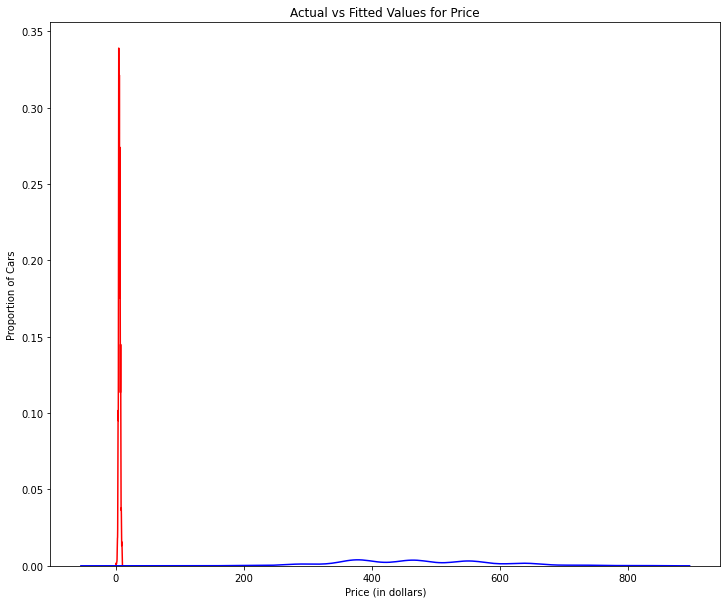

In [246]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['OverallQual'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 5

In [247]:
lm5=LinearRegression()

In [248]:
x= df_house[['1stFlrSF']]
y= df_house['2ndFlrSF']

In [249]:
lm5.fit(x,y)

LinearRegression()

In [250]:
lm5.fit(df_house[['1stFlrSF']],df_house[['2ndFlrSF']])
Yhat1=lm5.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [251]:
mse= mean_squared_error(df_house['2ndFlrSF'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm5.score(df_house[['1stFlrSF']],df_house[['2ndFlrSF']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  182606.5998471715
coefficiend of determination: 0.04106547467482524


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


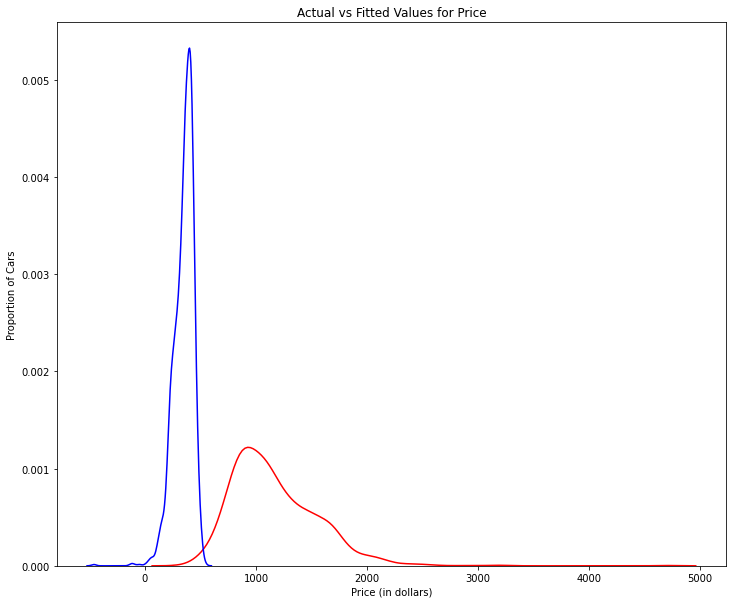

In [252]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['1stFlrSF'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 6

In [253]:
lm6= LinearRegression()

In [254]:
x= df_house[['MoSold']]
y= df_house['GarageArea']

In [255]:
lm6.fit(x,y)

LinearRegression()

In [256]:
lm6.fit(df_house[['MoSold']],df_house[['GarageArea']])
Yhat1=lm6.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [257]:
mse= mean_squared_error(df_house['GarageArea'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm6.score(df_house[['MoSold']],df_house[['GarageArea']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  45645.45322191517
coefficiend of determination: 0.0007825334765676484


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


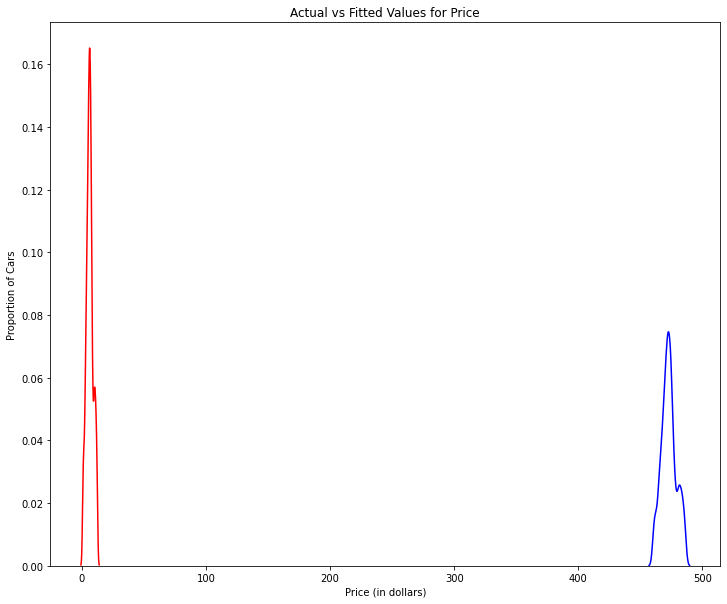

In [258]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['MoSold'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 7

In [259]:
lm7= LinearRegression()

In [260]:
x= df_house[['BsmtFinSF1']]
y= df_house['BsmtFinSF2']

In [261]:
lm7.fit(x,y)

LinearRegression()

In [262]:
lm7.fit(df_house[['BsmtFinSF1']],df_house[['BsmtFinSF2']])
Yhat1=lm7.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [263]:
mse= mean_squared_error(df_house['BsmtFinSF2'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm7.score(df_house[['BsmtFinSF1']],df_house[['BsmtFinSF2']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  25940.762306526125
coefficiend of determination: 0.0025117537874861373


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


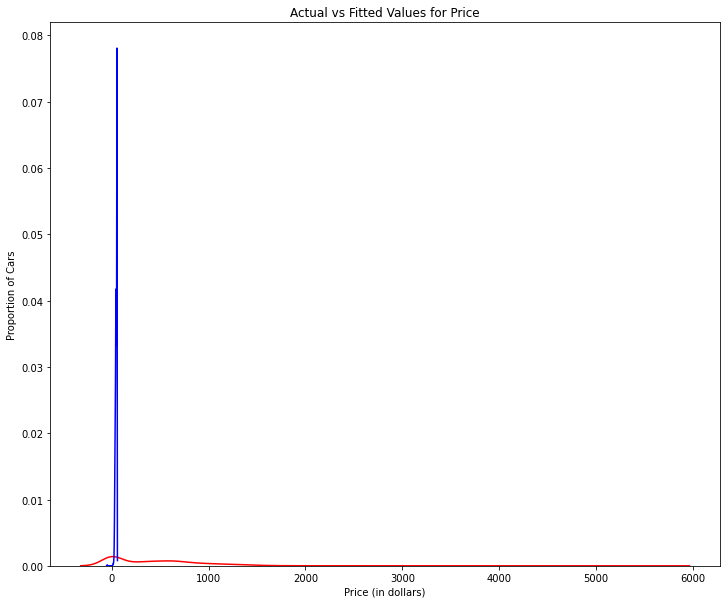

In [264]:
width = 12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['BsmtFinSF1'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#Model 8

In [265]:
lm8= LinearRegression()

In [266]:
x= df_house[['FullBath','HalfBath']]
y= df_house['SalePrice']

In [267]:
lm8.fit(x,y)

LinearRegression()

In [268]:
lm8.fit(df_house[['FullBath','HalfBath']],df_house[['SalePrice']])
Yhat1=lm8.predict(x)

print(f"intercept:{lm1.intercept_}")
print(f"slope:{lm1.coef_}")

intercept:[-2530308.24573236]
slope:[[1375.37346794]]


##Evaluate 

In [269]:
mse= mean_squared_error(df_house['SalePrice'], Yhat1)
print('The mean square error of Saleprice and predicted value is: ', mse)

r_sq=lm8.score(df_house[['FullBath','HalfBath']],df_house[['SalePrice']])
print(f"coefficiend of determination: {r_sq}")

The mean square error of Saleprice and predicted value is:  4047211057.9371095
coefficiend of determination: 0.35827703701075364


#Dummy Variables 

In [270]:
def model(X=True, Y=True):
  lm = LinearRegression()

  lm.fit(X,Y)
  Yhat = lm.predict(X)

  plt.figure()

  ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
  sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

  plt.title('Actual vs Fitted Values for Price')
  plt.xlabel('Price (in dollars)')
  plt.ylabel('Proportion of Cars')

  plt.show()
  plt.close()
  return

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


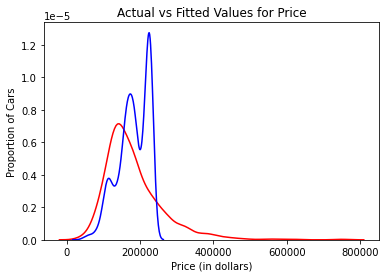

In [271]:
lm = LinearRegression()

X= df_house[['YearBuilt']]
Y= df_house['SalePrice']

lm.fit(X,Y)
Yhat = lm.predict(X)

plt.figure()

ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


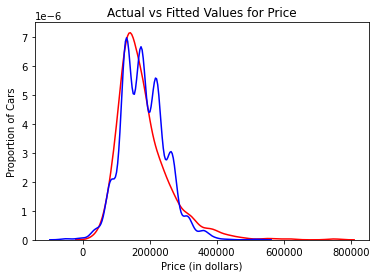

In [272]:
model(X=df_house[['LotArea','OverallQual']], Y=df_house['SalePrice'])

In [273]:
df_house['BldgType'].dtype

dtype('O')

In [274]:
df_house['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

##Dummy Variable 1

In [275]:
df_house['YearBuilt'].dtype

dtype('int64')

In [276]:
YearBuilt=df_house['YearBuilt'].unique()
YearBuilt[0:3]

array([2003, 1976, 2001])

In [277]:
YearBuilt=df_house['YearBuilt'].unique()
df_house[YearBuilt[0:2]]

KeyError: ignored

In [278]:
df_house['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

In [287]:
df_house.head()

,Hip,Gable,1872,1875,1880,1882,1885,1890,1892,1893,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,0,1,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,1,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,1,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,0,1,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [286]:
df_house=pd.get_dummies(df_house['RoofStyle'])[['Hip','Gable']].join(df_house)

In [285]:
df_house=pd.get_dummies(df_house['YearBuilt']).join(df_house)

In [284]:
df_house.head(5)

,0,1,2,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,0,1,60,RL,65.0,8450,Pave,NaN,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,0,0,2,20,RL,80.0,9600,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,1,0,3,60,RL,68.0,11250,Pave,NaN,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,1,0,0,4,70,RL,60.0,9550,Pave,NaN,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,0,1,0,5,60,RL,84.0,14260,Pave,NaN,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [283]:
df_house['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

##Dummy Variable 2

In [282]:
df_house['HalfBath'].dtype

df_house['HalfBath'].unique()

pd.get_dummies(df_house['HalfBath'])

,0,1,2
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
1455,0,1,0
1456,1,0,0
1457,1,0,0
1458,1,0,0


In [281]:
df_house=pd.get_dummies(df_house['HalfBath']).join(df_house)

In [280]:
df_house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [279]:
df_house['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

#Work 11/17

In [294]:
df_house['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

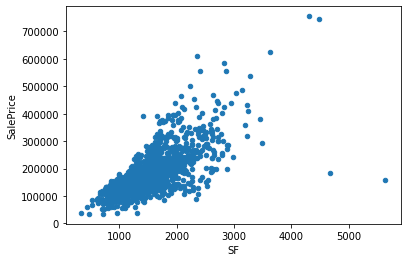

In [293]:
df_house['SF']=df_house['1stFlrSF']+df_house['2ndFlrSF']
df_house.plot.scatter('SF', 'SalePrice')

In [292]:
pd.get_dummies(df_house['RoofStyle'])
pd.get_dummies(df_house['RoofStyle']).join(df_house['RoofStyle'])
pd.get_dummies(df_house['RoofStyle'])['Flat']
pd.get_dummies(df_house['RoofStyle'])[['Gable','Hip']]

,Gable,Hip
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1455,1,0
1456,1,0
1457,1,0
1458,0,1


In [309]:
df_house.head(2)

,Gable,Hip,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0,1,60,RL,65.0,8450,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,0,2,20,RL,80.0,9600,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


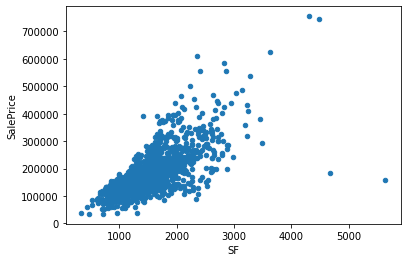

In [299]:
df_house.plot.scatter('SF', 'SalePrice')

In [302]:
df_house=pd.get_dummies(df_house['RoofStyle'])[['Gable','Hip']].join(df_house)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


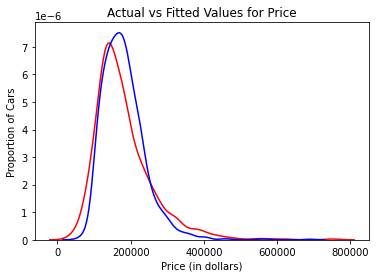

,Gable_SF,Gable,SF
0,1710,1,1710
1,1262,1,1262
2,1786,1,1786
3,1717,1,1717
4,2198,1,2198
...,...,...,...
1455,1647,1,1647
1456,2073,1,2073
1457,2340,1,2340
1458,0,0,1078


In [295]:
df_house['Gable_SF']=df_house['Gable']*df_house['SF']
df_house['Hip_SF']=df_house['Hip']*df_house['SF']
X = ['SF','Hip', 'Hip_SF', 'Gable', 'Gable_SF']

model(X=df_house[['SF','Hip','Hip_SF','Gable', 'Gable_SF']],Y=df_house['SalePrice'])

df_house[['Gable_SF', 'Gable', 'SF']]